Import package

In [1]:
import package_.preprocessing as preprocessing
import package_.featureSelection as featureSelection
import package_.classifier as classifier
import package_.ensemble as ensemble
import package_.performanceMetrics as performanceMetrics

Preprocessing

In [2]:
pr = preprocessing.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [3]:
X, y = pr.set_target('class')

In [4]:
pr.standardization()

Feature Selection

Lasso

In [5]:
lasso_features = featureSelection.FeatureSelection(X, y, 'lasso', 100)

In [6]:
lasso_features.show_features()

0       SFTPC
1      SLC6A4
2      CLDN18
3        AGER
4       ITLN2
5        LGI3
6    C13orf36
7      FAM83A
8       FABP4
9        HBA1
Name: Lasso, dtype: object


In [7]:
lasso_features = lasso_features.get_features()

ReliefF

In [8]:
relieff_features = featureSelection.FeatureSelection(X, y, 'relieff', 100)

In [9]:
relieff_features.show_features()

0         CELA2B
1          OR6K3
2    CCL14-CCL15
3         MAGEA2
4           PDX1
5          CHRM2
6         TFAP2D
7         SPHKAP
8            OTC
9         HOTAIR
Name: ReliefF, dtype: object


In [10]:
relieff_features = relieff_features.get_features()

Mrmr

In [11]:
mrmr_features = featureSelection.FeatureSelection(X, y, 'mrmr', 100)

100%|██████████| 100/100 [00:12<00:00,  7.81it/s]


In [12]:
mrmr_features.show_features()

0     PAICS
1    ANGPT4
2     GOLM1
3    SH3GL3
4     HTR3C
5     OR6K3
6      MYOC
7    CELA2B
8       MDK
9     OVCH1
Name: Mrmr, dtype: object


In [13]:
mrmr_features = mrmr_features.get_features()

uTest

In [14]:
uTest_features = featureSelection.FeatureSelection(X, y, 'uTest', 100)

In [15]:
uTest_features.show_features()

0     LRRTM4
1     TRIM46
2    PABPC1L
3      CD79A
4      GIPC2
5       NTN4
6       XKRX
7      SVEP1
8    GPR109B
9     DPYSL2
Name: Mann-Whitney U-test, dtype: object


In [16]:
uTest_features = uTest_features.get_features()

Classifier

Lasso

In [17]:
clf_lasso = classifier.Classifier(X, y, features=lasso_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [18]:
pm_lasso = performanceMetrics.PerformanceMetrics(clf_lasso)
pm_lasso.all_metrics()

["ACC: {'adaboost': 0.9912885662431942, 'gradient_boosting': 0.9790986085904414, 'random_forest': 0.9878100423472473, 'k_neighbors': 0.9912280701754386, 'decision_tree': 0.9808227465214759, 'extra_trees': 0.9930127041742285, 'svm': 0.8972171808832424, 'xgb': 0.9878100423472473}",
 "Roc Auc: {'adaboost': 0.9713725490196079, 'gradient_boosting': 0.9220776772247362, 'random_forest': 0.9620588235294119, 'k_neighbors': 0.986078431372549, 'decision_tree': 0.9287443438914028, 'extra_trees': 0.9797058823529413, 'svm': 0.5, 'xgb': 0.9547058823529413}",
 "F1 score: {'adaboost': 0.9951626591230551, 'gradient_boosting': 0.9884600948092249, 'random_forest': 0.9932381486127049, 'k_neighbors': 0.995027217007415, 'decision_tree': 0.9893745905552456, 'extra_trees': 0.9961150400754362, 'svm': 0.9458168844407376, 'xgb': 0.993257373836198}",
 "MCC: {'adaboost': 0.9527781868604664, 'gradient_boosting': 0.8812893545082299, 'random_forest': 0.934149605353092, 'k_neighbors': 0.9594765548214331, 'decision_tree

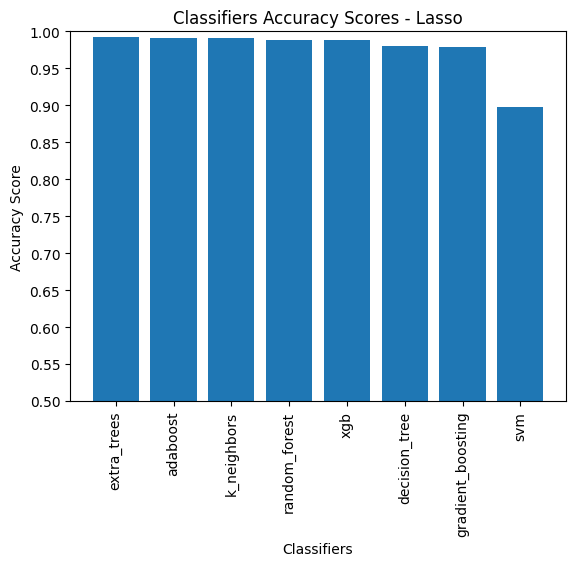

extra_trees: 0.9930127041742285
adaboost: 0.9912885662431942
k_neighbors: 0.9912280701754386
random_forest: 0.9878100423472473
xgb: 0.9878100423472473
decision_tree: 0.9808227465214759
gradient_boosting: 0.9790986085904414
svm: 0.8972171808832424


In [19]:
pm_lasso.plot_classifier_acc()

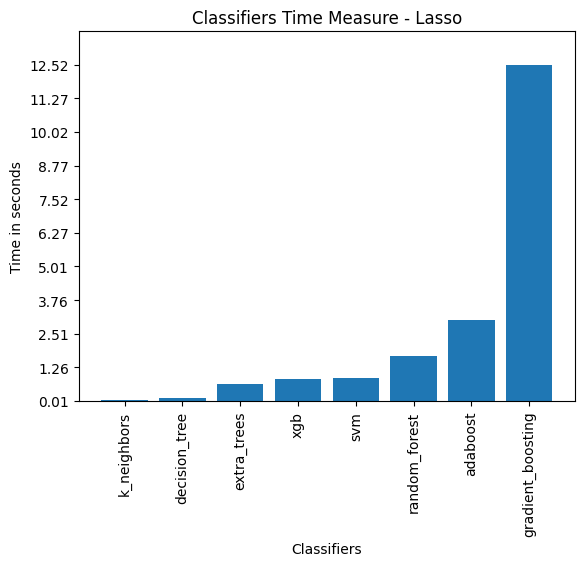

k_neighbors: 0.044673919677734375 s.
decision_tree: 0.13283681869506836 s.
extra_trees: 0.6300904750823975 s.
xgb: 0.8155558109283447 s.
svm: 0.84670090675354 s.
random_forest: 1.6675195693969727 s.
adaboost: 3.008960247039795 s.
gradient_boosting: 12.510153770446777 s.


In [20]:
pm_lasso.plot_classifier_time()

Relieff

In [21]:
clf_relieff = classifier.Classifier(X, y, features=relieff_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [22]:
pm_relieff = performanceMetrics.PerformanceMetrics(clf_relieff)
pm_relieff.all_metrics()

["ACC: {'adaboost': 0.989503932244404, 'gradient_boosting': 0.9754990925589837, 'random_forest': 0.9877495462794919, 'k_neighbors': 0.9859951603145797, 'decision_tree': 0.9563520871143375, 'extra_trees': 0.9877495462794919, 'svm': 0.8972171808832424, 'xgb': 0.9825166364186328}",
 "Roc Auc: {'adaboost': 0.9867835595776772, 'gradient_boosting': 0.9094494720965309, 'random_forest': 0.9694306184012067, 'k_neighbors': 0.9831749622926094, 'decision_tree': 0.9060935143288085, 'extra_trees': 0.9767835595776772, 'svm': 0.5, 'xgb': 0.9591365007541478}",
 "F1 score: {'adaboost': 0.9940563432210073, 'gradient_boosting': 0.9864820939578222, 'random_forest': 0.9931637578108166, 'k_neighbors': 0.9921357522608123, 'decision_tree': 0.9754098931921871, 'extra_trees': 0.993104140084338, 'svm': 0.9458168844407376, 'xgb': 0.9901297442053745}",
 "MCC: {'adaboost': 0.9517085173630754, 'gradient_boosting': 0.8582013324358876, 'random_forest': 0.9347587337464205, 'k_neighbors': 0.929661417773422, 'decision_tre

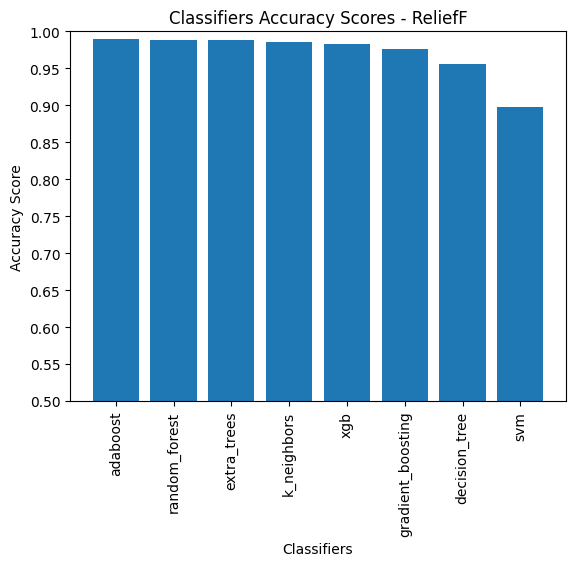

adaboost: 0.989503932244404
random_forest: 0.9877495462794919
extra_trees: 0.9877495462794919
k_neighbors: 0.9859951603145797
xgb: 0.9825166364186328
gradient_boosting: 0.9754990925589837
decision_tree: 0.9563520871143375
svm: 0.8972171808832424


In [23]:
pm_relieff.plot_classifier_acc()

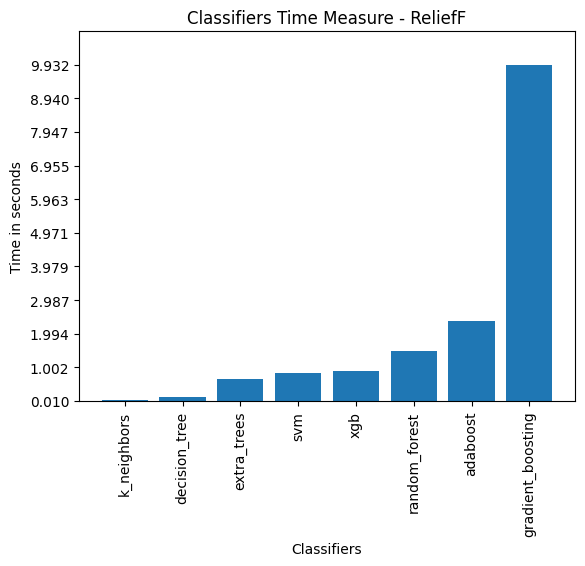

k_neighbors: 0.04384350776672363 s.
decision_tree: 0.12626934051513672 s.
extra_trees: 0.6475429534912109 s.
svm: 0.8400232791900635 s.
xgb: 0.8867545127868652 s.
random_forest: 1.489504098892212 s.
adaboost: 2.357370138168335 s.
gradient_boosting: 9.921759605407715 s.


In [24]:
pm_relieff.plot_classifier_time()

Mrmr

In [25]:
clf_mrmr = classifier.Classifier(X, y, features=mrmr_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [26]:
pm_mrmr = performanceMetrics.PerformanceMetrics(clf_mrmr)
pm_mrmr.all_metrics()

["ACC: {'adaboost': 0.9912885662431942, 'gradient_boosting': 0.9704174228675135, 'random_forest': 0.9877495462794919, 'k_neighbors': 0.989503932244404, 'decision_tree': 0.9686327888687236, 'extra_trees': 0.9947670901391408, 'svm': 0.8972171808832424, 'xgb': 0.9895341802782818}",
 "Roc Auc: {'adaboost': 0.9713725490196079, 'gradient_boosting': 0.9008220211161388, 'random_forest': 0.9694306184012067, 'k_neighbors': 0.9777828054298643, 'decision_tree': 0.9129185520361991, 'extra_trees': 0.980686274509804, 'svm': 0.5, 'xgb': 0.9630392156862746}",
 "F1 score: {'adaboost': 0.9951806285749868, 'gradient_boosting': 0.9835251705935519, 'random_forest': 0.9931835597910146, 'k_neighbors': 0.9941547996685938, 'decision_tree': 0.9824980859155975, 'extra_trees': 0.9971051390853372, 'svm': 0.9458168844407376, 'xgb': 0.9941919738192307}",
 "MCC: {'adaboost': 0.952057962763098, 'gradient_boosting': 0.8434687499585738, 'random_forest': 0.9332109643893463, 'k_neighbors': 0.9439583712117156, 'decision_tre

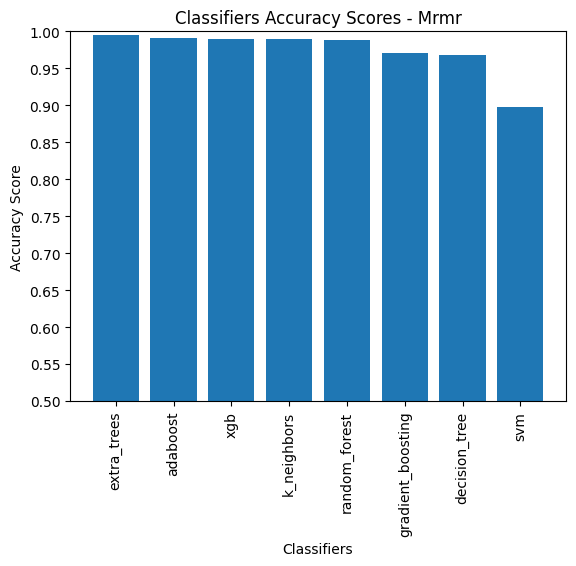

extra_trees: 0.9947670901391408
adaboost: 0.9912885662431942
xgb: 0.9895341802782818
k_neighbors: 0.989503932244404
random_forest: 0.9877495462794919
gradient_boosting: 0.9704174228675135
decision_tree: 0.9686327888687236
svm: 0.8972171808832424


In [27]:
pm_mrmr.plot_classifier_acc()

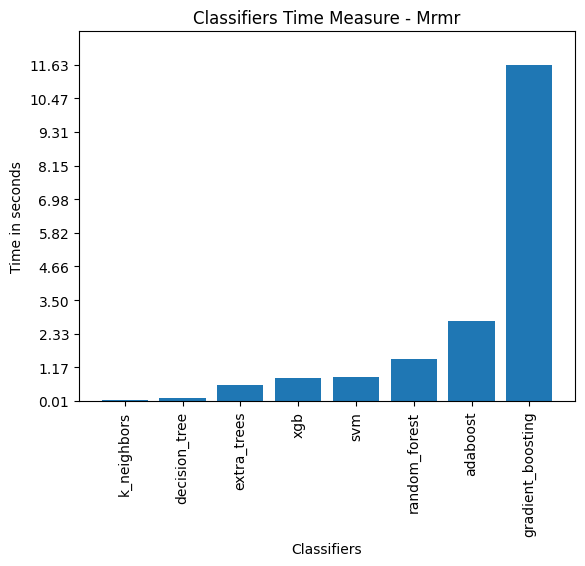

k_neighbors: 0.040593862533569336 s.
decision_tree: 0.12607026100158691 s.
extra_trees: 0.570387601852417 s.
xgb: 0.8035235404968262 s.
svm: 0.8236751556396484 s.
random_forest: 1.4672627449035645 s.
adaboost: 2.763658046722412 s.
gradient_boosting: 11.62487268447876 s.


In [28]:
pm_mrmr.plot_classifier_time()

uTest

In [29]:
clf_uTest = classifier.Classifier(X, y, features=uTest_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [30]:
pm_uTest = performanceMetrics.PerformanceMetrics(clf_uTest)
pm_uTest.all_metrics()

["ACC: {'adaboost': 0.9878100423472473, 'gradient_boosting': 0.9860556563823352, 'random_forest': 0.9895644283121596, 'k_neighbors': 0.9825166364186328, 'decision_tree': 0.9878100423472473, 'extra_trees': 0.9860556563823353, 'svm': 0.8972171808832424, 'xgb': 0.9912583182093162}",
 "Roc Auc: {'adaboost': 0.962077677224736, 'gradient_boosting': 0.9610972850678733, 'random_forest': 0.9556862745098039, 'k_neighbors': 0.9738800904977376, 'decision_tree': 0.9694494720965311, 'extra_trees': 0.9463914027149322, 'svm': 0.5, 'xgb': 0.9713725490196079}",
 "F1 score: {'adaboost': 0.9932210893659514, 'gradient_boosting': 0.992211199042724, 'random_forest': 0.9942476613286825, 'k_neighbors': 0.990193826872285, 'decision_tree': 0.9932025965319248, 'extra_trees': 0.9923251283124885, 'svm': 0.9458168844407376, 'xgb': 0.9951443547716117}",
 "MCC: {'adaboost': 0.9341717217184972, 'gradient_boosting': 0.9273859820624676, 'random_forest': 0.9405126052642364, 'k_neighbors': 0.9122031665025723, 'decision_tre

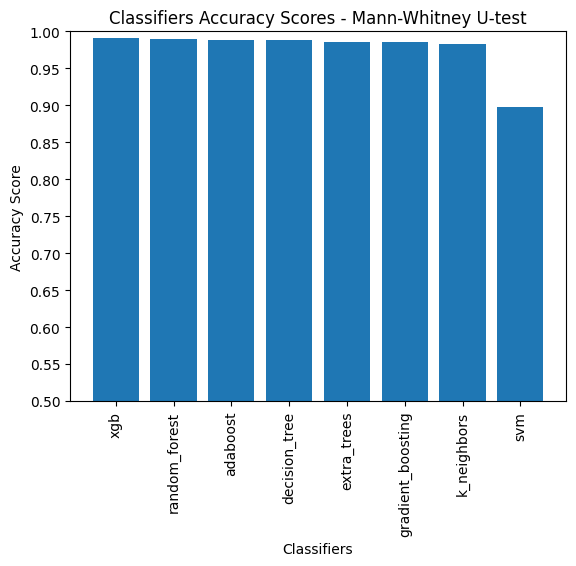

xgb: 0.9912583182093162
random_forest: 0.9895644283121596
adaboost: 0.9878100423472473
decision_tree: 0.9878100423472473
extra_trees: 0.9860556563823353
gradient_boosting: 0.9860556563823352
k_neighbors: 0.9825166364186328
svm: 0.8972171808832424


In [31]:
pm_uTest.plot_classifier_acc()

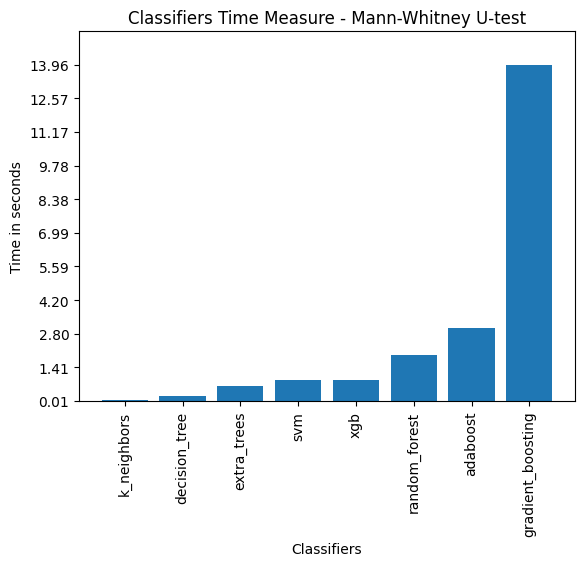

k_neighbors: 0.061829566955566406 s.
decision_tree: 0.19805288314819336 s.
extra_trees: 0.6463017463684082 s.
svm: 0.8724360466003418 s.
xgb: 0.8987555503845215 s.
random_forest: 1.919764757156372 s.
adaboost: 3.0338265895843506 s.
gradient_boosting: 13.951184511184692 s.


In [32]:
pm_uTest.plot_classifier_time()

Ensemble

Lasso

In [33]:
ens_lasso = ensemble.Ensemble(X, y, features=lasso_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [34]:
pm_ens_lasso = performanceMetrics.PerformanceMetrics(ens_lasso)
pm_ens_lasso.all_metrics()

["ACC: {'voting': 0.9913188142770719, 'bagging': 0.9912885662431942, 'stacking': 0.9895946763460375}",
 "Roc Auc: {'voting': 0.9640196078431373, 'bagging': 0.9713725490196079, 'stacking': 0.9556862745098039}",
 "F1 score: {'voting': 0.9952183466325069, 'bagging': 0.9951806285749868, 'stacking': 0.9942659656801259}",
 "MCC: {'voting': 0.9508099059474497, 'bagging': 0.952057962763098, 'stacking': 0.9412316988346229}",
 "MSE: {'voting': 0.008681185722928008, 'bagging': 0.008711433756805807, 'stacking': 0.010405323653962493}"]

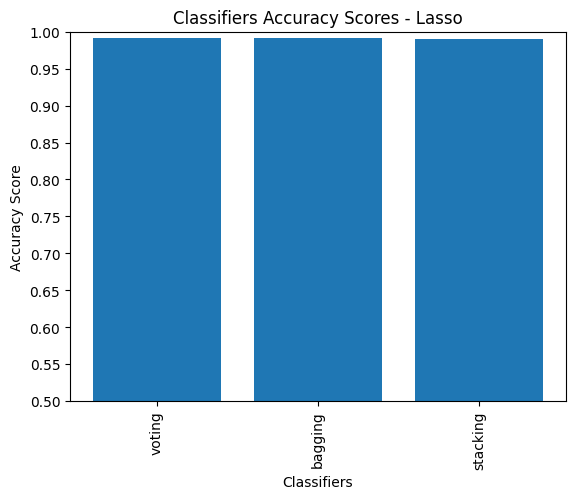

voting: 0.9913188142770719
bagging: 0.9912885662431942
stacking: 0.9895946763460375


In [35]:
pm_ens_lasso.plot_classifier_acc()

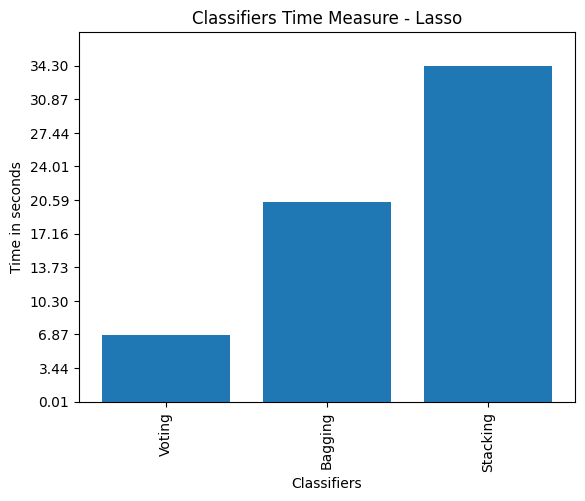

Voting: 6.772474527359009 s.
Bagging: 20.336490631103516 s.
Stacking: 34.29205822944641 s.


In [36]:
pm_ens_lasso.plot_classifier_time()

Relieff

In [37]:
ens_relieff = ensemble.Ensemble(X, y, features=relieff_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [38]:
pm_ens_relieff = performanceMetrics.PerformanceMetrics(ens_relieff)
pm_ens_relieff.all_metrics()

["ACC: {'voting': 0.9877495462794919, 'bagging': 0.9895039322444041, 'stacking': 0.9877495462794919}",
 "Roc Auc: {'voting': 0.9767835595776772, 'bagging': 0.9777639517345399, 'stacking': 0.9767835595776772}",
 "F1 score: {'voting': 0.993104140084338, 'bagging': 0.994134443114641, 'stacking': 0.993104140084338}",
 "MCC: {'voting': 0.9393803691050511, 'bagging': 0.9450560344296338, 'stacking': 0.9393803691050511}",
 "MSE: {'voting': 0.012250453720508167, 'bagging': 0.010496067755595886, 'stacking': 0.012250453720508167}"]

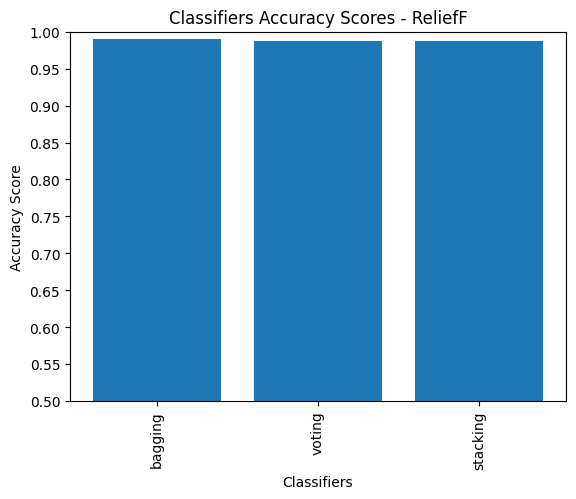

bagging: 0.9895039322444041
voting: 0.9877495462794919
stacking: 0.9877495462794919


In [39]:
pm_ens_relieff.plot_classifier_acc()

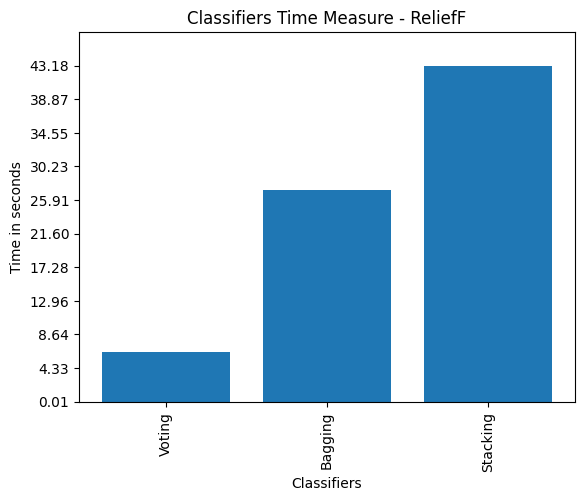

Voting: 6.319006443023682 s.
Bagging: 27.129974603652954 s.
Stacking: 43.17312407493591 s.


In [40]:
pm_ens_relieff.plot_classifier_time()

Mrmr

In [41]:
ens_mrmr = ensemble.Ensemble(X, y, features=mrmr_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [42]:
pm_ens_mrmr = performanceMetrics.PerformanceMetrics(ens_relieff)
pm_ens_mrmr.all_metrics()

["ACC: {'voting': 0.9877495462794919, 'bagging': 0.9895039322444041, 'stacking': 0.9877495462794919}",
 "Roc Auc: {'voting': 0.9767835595776772, 'bagging': 0.9777639517345399, 'stacking': 0.9767835595776772}",
 "F1 score: {'voting': 0.993104140084338, 'bagging': 0.994134443114641, 'stacking': 0.993104140084338}",
 "MCC: {'voting': 0.9393803691050511, 'bagging': 0.9450560344296338, 'stacking': 0.9393803691050511}",
 "MSE: {'voting': 0.012250453720508167, 'bagging': 0.010496067755595886, 'stacking': 0.012250453720508167}"]

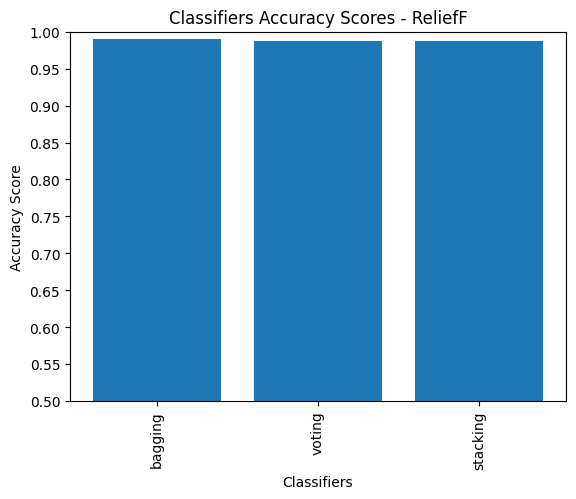

bagging: 0.9895039322444041
voting: 0.9877495462794919
stacking: 0.9877495462794919


In [43]:
pm_ens_mrmr.plot_classifier_acc()

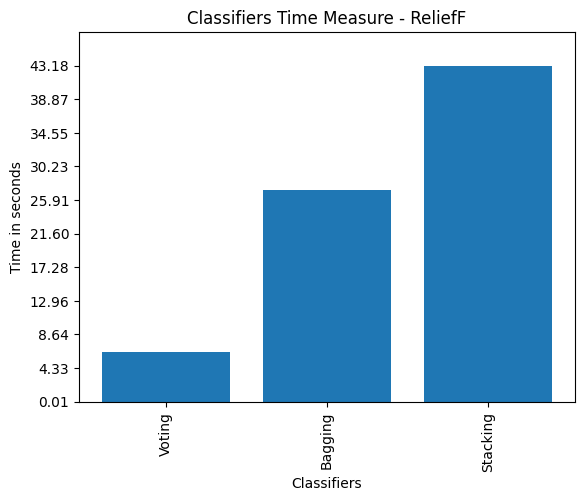

Voting: 6.319006443023682 s.
Bagging: 27.129974603652954 s.
Stacking: 43.17312407493591 s.


In [44]:
pm_ens_mrmr.plot_classifier_time()

uTest

In [45]:
ens_uTest = ensemble.Ensemble(X, y, features=uTest_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [46]:
pm_ens_uTest = performanceMetrics.PerformanceMetrics(ens_uTest)
pm_ens_uTest.all_metrics()

["ACC: {'voting': 0.9930127041742285, 'bagging': 0.9912583182093163, 'stacking': 0.989534180278282}",
 "Roc Auc: {'voting': 0.9797058823529413, 'bagging': 0.9640196078431373, 'stacking': 0.9630392156862746}",
 "F1 score: {'voting': 0.9961150400754362, 'bagging': 0.9951635799951049, 'stacking': 0.9942099432711624}",
 "MCC: {'voting': 0.9623563939732934, 'bagging': 0.9507943149222065, 'stacking': 0.9417606620798848}",
 "MSE: {'voting': 0.006987295825771326, 'bagging': 0.008741681790683607, 'stacking': 0.010465819721718088}"]

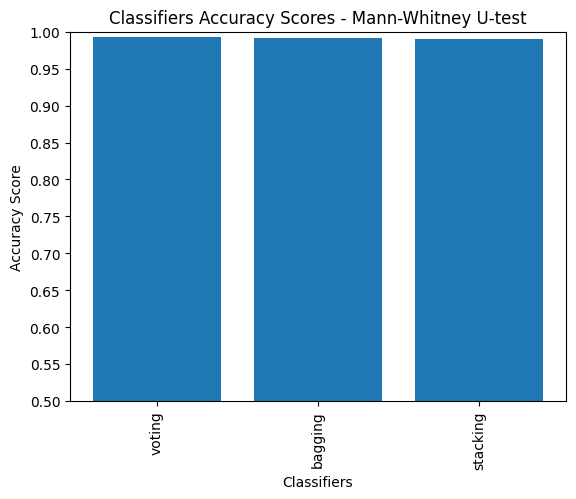

voting: 0.9930127041742285
bagging: 0.9912583182093163
stacking: 0.989534180278282


In [47]:
pm_ens_uTest.plot_classifier_acc()

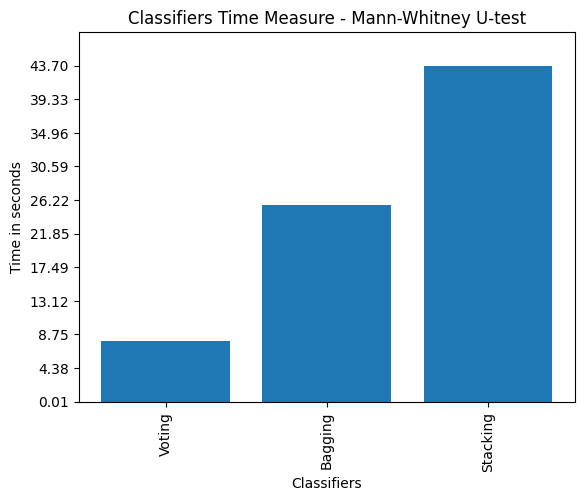

Voting: 7.89304518699646 s.
Bagging: 25.615782976150513 s.
Stacking: 43.68866181373596 s.


In [48]:
pm_ens_uTest.plot_classifier_time()